**IMPORTING** **SOLAR** **DATA** **SET**

In [4]:
import pandas as pd
file_path = '/content/03f4d1c1a55947025601.csv'
data = pd.read_csv(file_path)
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

(   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
 0                       2.17                               31   
 1                       2.31                               27   
 2                       3.65                               33   
 3                       5.82                               30   
 4                       7.73                               27   
 
    mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
 0                       1035.0                      0.0                  0.0   
 1                       1035.1                      0.0                  0.0   
 2                       1035.4                      0.0                  0.0   
 3                       1035.4                      0.0                  0.0   
 4                       1034.4                      0.0                  0.0   
 
    total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
 0                    0.0                             

**FEATURE EXTRACTION**

In [5]:

features = [
    'temperature_2_m_above_gnd',
    'relative_humidity_2_m_above_gnd',
    'total_cloud_cover_sfc',
    'shortwave_radiation_backwards_sfc',
    'angle_of_incidence',
    'zenith',
    'azimuth'
]
target = 'generated_power_kw'
X = data[features]
y = data[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(265861.48007664236, 0.7089523528859877)

LINEAR REGRESSION and plotting

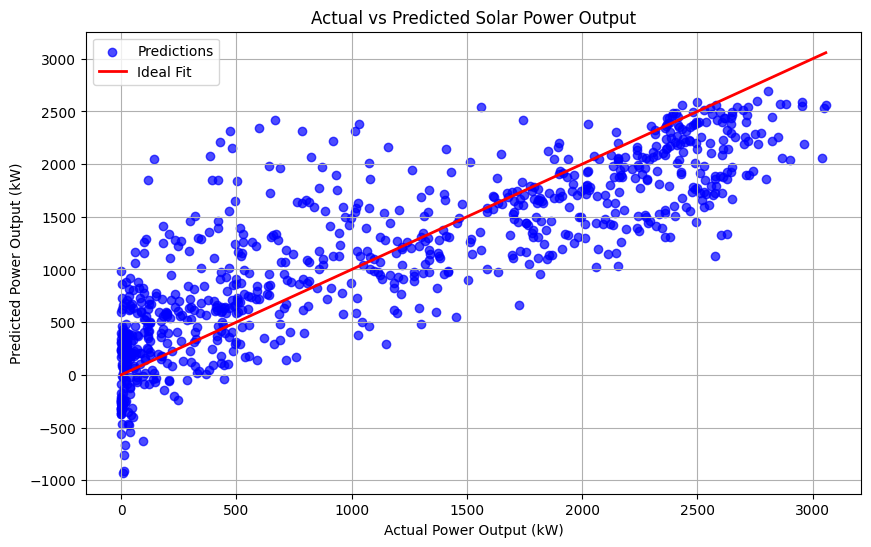

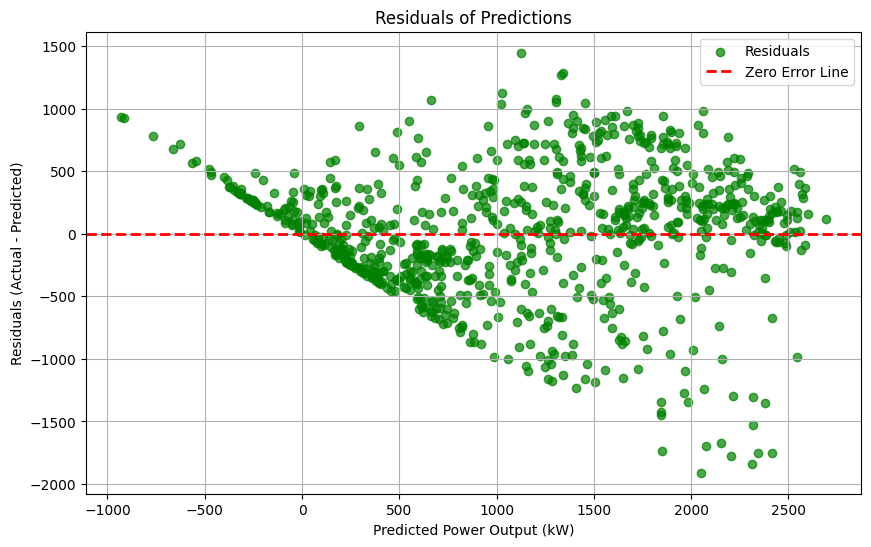

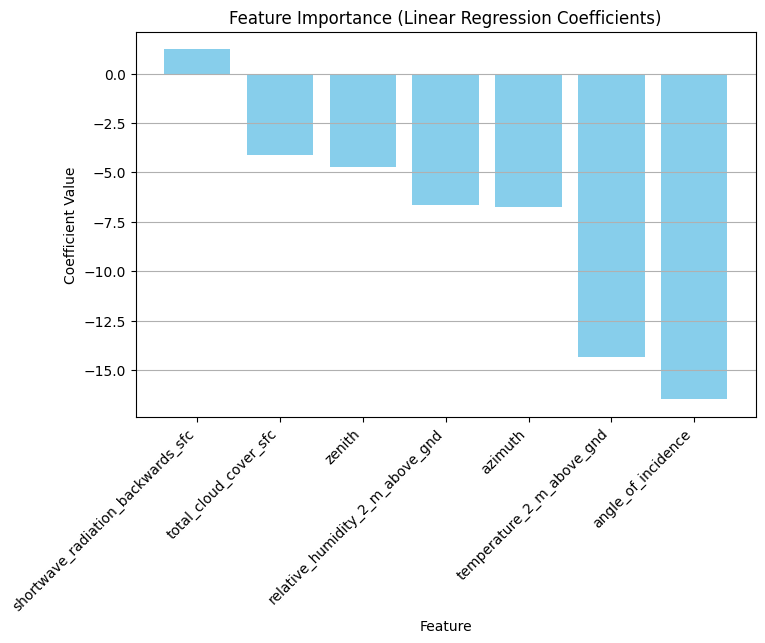

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.title('Actual vs Predicted Solar Power Output')
plt.xlabel('Actual Power Output (kW)')
plt.ylabel('Predicted Power Output (kW)')
plt.legend()
plt.grid()
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green', label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Power Output (kW)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid()
plt.show()
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
max_conditions = data.loc[data['generated_power_kw'].idxmax(), features + [target]]
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_poly, r2_poly, mse_rf, r2_rf, max_conditions


(215045.70683838014,
 0.7645821162989191,
 196075.4133485111,
 0.7853495448248455,
 temperature_2_m_above_gnd               4.230000
 relative_humidity_2_m_above_gnd        45.000000
 total_cloud_cover_sfc                   0.000000
 shortwave_radiation_backwards_sfc     652.370000
 angle_of_incidence                      4.339392
 zenith                                 43.382265
 azimuth                               180.914410
 generated_power_kw                   3056.794100
 Name: 693, dtype: float64)